In [2]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#read Data
conductor=pd.read_csv("train.csv")
elements=pd.read_csv("unique_m.csv")


In [4]:
# Merge based on index
data = pd.concat([ elements.iloc[:,:-2],conductor], axis=1)


In [5]:
# Look at the data
data.head()


,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### 21,263 records and 167 features + the dependent variable

In [6]:
# Data size
data.shape


(21263, 168)

### The the distribution of the response variabl is right skewed, there seems to be a big outlier

In [7]:
# checking the dependen variable
data["critical_temp"].describe()


count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [8]:
# top 5 conductors
data['critical_temp'].nlargest(5)


20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
Name: critical_temp, dtype: float64

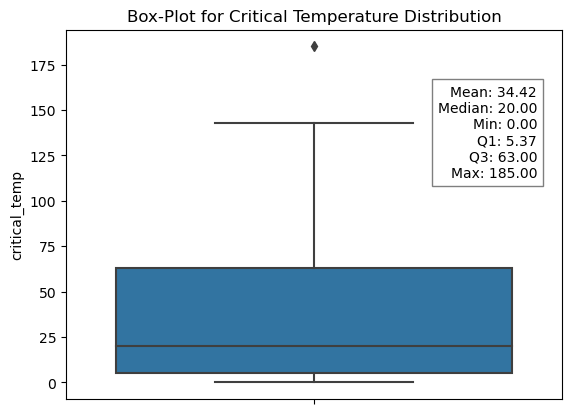

In [9]:
import matplotlib.pyplot as plt
# box plot
ax = sns.boxplot(y=data["critical_temp"])

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Box-Plot for Critical Temperature Distribution")

# Show the plot
plt.show()


In [9]:
#There are a lot of 143-135 
data["critical_temp"].nlargest(8)

20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
1343     136.0
5476     135.8
7105     135.7
Name: critical_temp, dtype: float64

Text(0.5, 1.0, 'Histogram of the distribution after the third quartile')

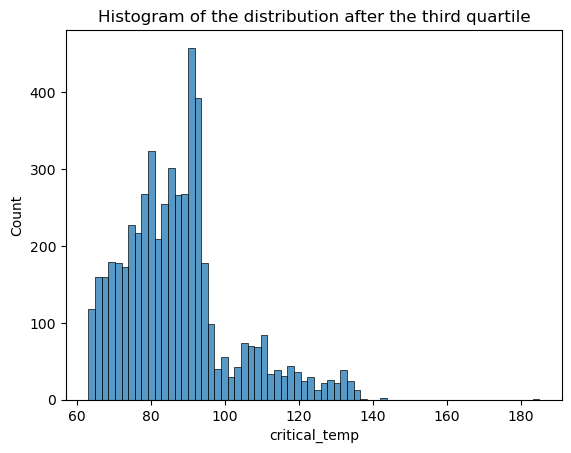

In [11]:
#Checking the distribution after the third quartile
#the count of conductures is less but there still quite a few up to 143
data[data["critical_temp"]>63]["critical_temp"]
sns.histplot(x=data[data["critical_temp"]>63]["critical_temp"])
plt.title("Histogram of the distribution after the third quartile")

##### + As assumed earlier it is mor of a bi-modal distribution one around 0 and another one around 82
+ Would be interested to see if the conductor that reaches 185 for critical temp is correct of it is a mistake. There is only 1 ate 185 and followed a bunch that reach 143 and less. 

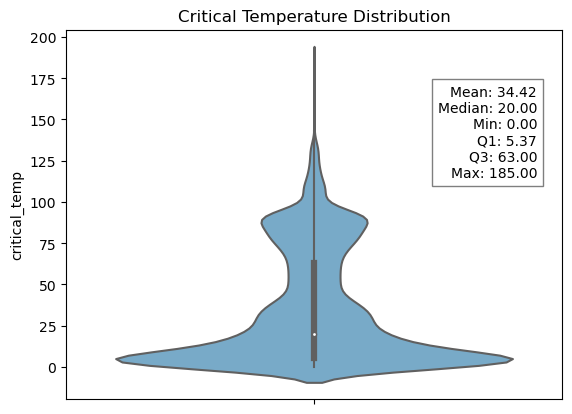

In [12]:
# Create the combined box and violin plot
ax = sns.violinplot(y=data["critical_temp"], inner="box", palette="Blues")

# Calculate statistics
mean = data["critical_temp"].mean()
median = data["critical_temp"].median()  # Median (Q2)
minimum = data["critical_temp"].min()
maximum = data["critical_temp"].max()
q1 = data["critical_temp"].quantile(0.25)
q3 = data["critical_temp"].quantile(0.75)

# Annotate the plot with statistics
stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nMin: {minimum:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMax: {maximum:.2f}"
plt.gca().text(0.95, 0.85, stats_text, transform=plt.gca().transAxes,
               fontsize=10, va='top', ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

# Add title to the plot
plt.title("Critical Temperature Distribution")

# Show the plot
plt.show()


In [10]:
# Columns in data where all values are 0
data.columns[(data == 0).all()]

Index(['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'], dtype='object')

In [11]:
# These columns can be dropped from dataset
drop_columns = data.columns[(data == 0).all()]
data = data.drop(drop_columns, axis=1)

In [12]:
data.shape

(21263, 159)

# EDA

# --> write right skewed/ left skewed and on the distributions

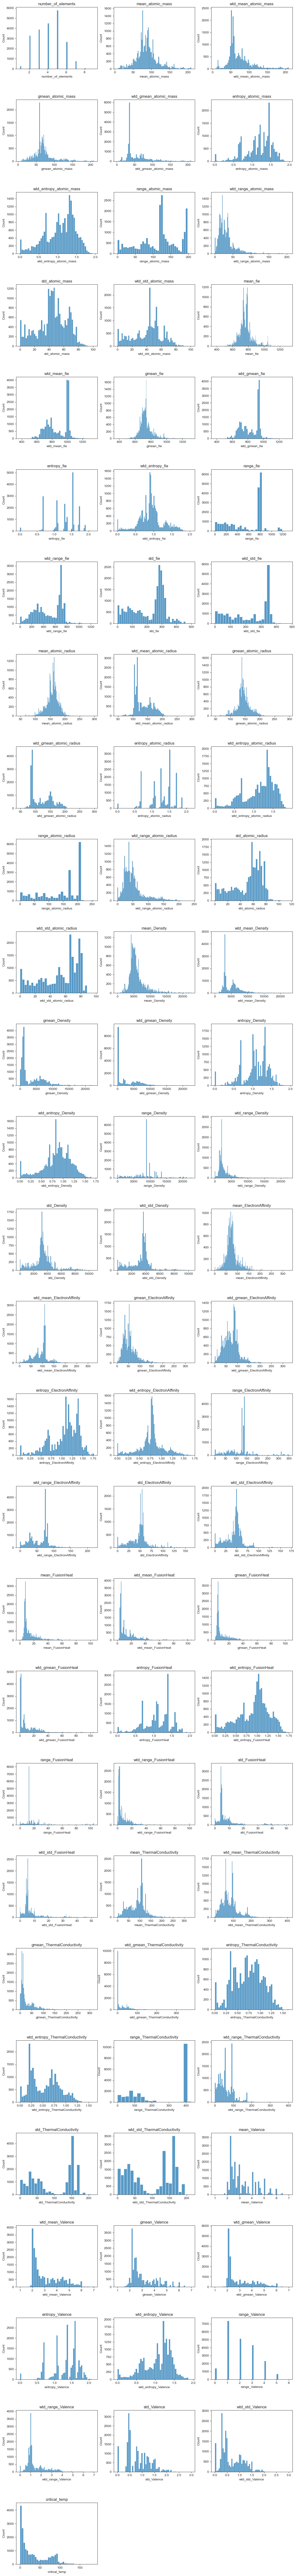

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Assuming conductor is your DataFrame
num_columns = len(conductor.columns)
num_rows = math.ceil(num_columns / 3)

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size here

# Set the style to white background
# sns.set_style("whitegrid")
sns.set_style("ticks")
for idx, col in enumerate(conductor.columns, start=1):
    plt.subplot(num_rows, 3, idx)
    sns.histplot(data=conductor[col], kde=False)
    plt.title(col)
plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
plt.show()


# --> create Facet wrap based on the similar a attribute to see patterns
# find a plot to show correlation that is not clutter

In [2]:
# Correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(46,44))
sns.heatmap(conductor.corr(), annot=True)


NameError: name 'sns' is not defined

<Figure size 4600x4400 with 0 Axes>

+ All numeric data

In [13]:
#All data is numeric
data.dtypes.unique()


array([dtype('float64'), dtype('int64')], dtype=object)

# Model

+ Set x and y
+ Standarize all the variables that are no the elements since the elements are dummies

In [14]:
#Scale data
from sklearn import preprocessing

x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

# Standarize all the non_element variables leaving the dummies alone
columns_to_standardize = x.iloc[:,77:].columns
data_to_standardize = conductor[columns_to_standardize]

standardized_data = preprocessing.StandardScaler().fit_transform(data_to_standardize)

# Replace the original columns with the standardized data
x[columns_to_standardize] = standardized_data



In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
#Run Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression().fit(X_train,y_train)

from sklearn.metrics import mean_squared_error 
pred = lr.predict(X_test)

# Calculate the mean squared error (you can use other metrics as well)
mse = mean_squared_error(y_test, pred)

# Print the score (in this case, mean squared error)
print("Mean Squared Error:", mse)

Mean Squared Error: 272.6842745951571


In [18]:
# Calculate feature importances (absolute values of coefficients)
importances = np.abs(lr.coef_[0])
features = x.columns

# Create a DataFrame to hold feature importances and sort it
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df["ActualCoef"]=lr.coef_[0]
importance_df=importance_df.sort_values(by='Importance', ascending=False)
# importance_df = importance_df.sort_values(by='Importance', ascending=False).index

In [19]:
#Looking at the 10 values have the least impact in the model
importance_df.nsmallest(10, 'Importance')

,Feature,Importance,ActualCoef
66,Ta,0.002374,0.002374
4,C,0.003107,-0.003107
19,V,0.004655,-0.004655
51,La,0.008257,0.008257
35,Zr,0.020024,0.020024
41,Pd,0.025296,0.025296
9,Mg,0.034563,0.034563
70,Ir,0.045468,0.045468
18,Ti,0.048911,-0.048911
53,Pr,0.050480,-0.050480


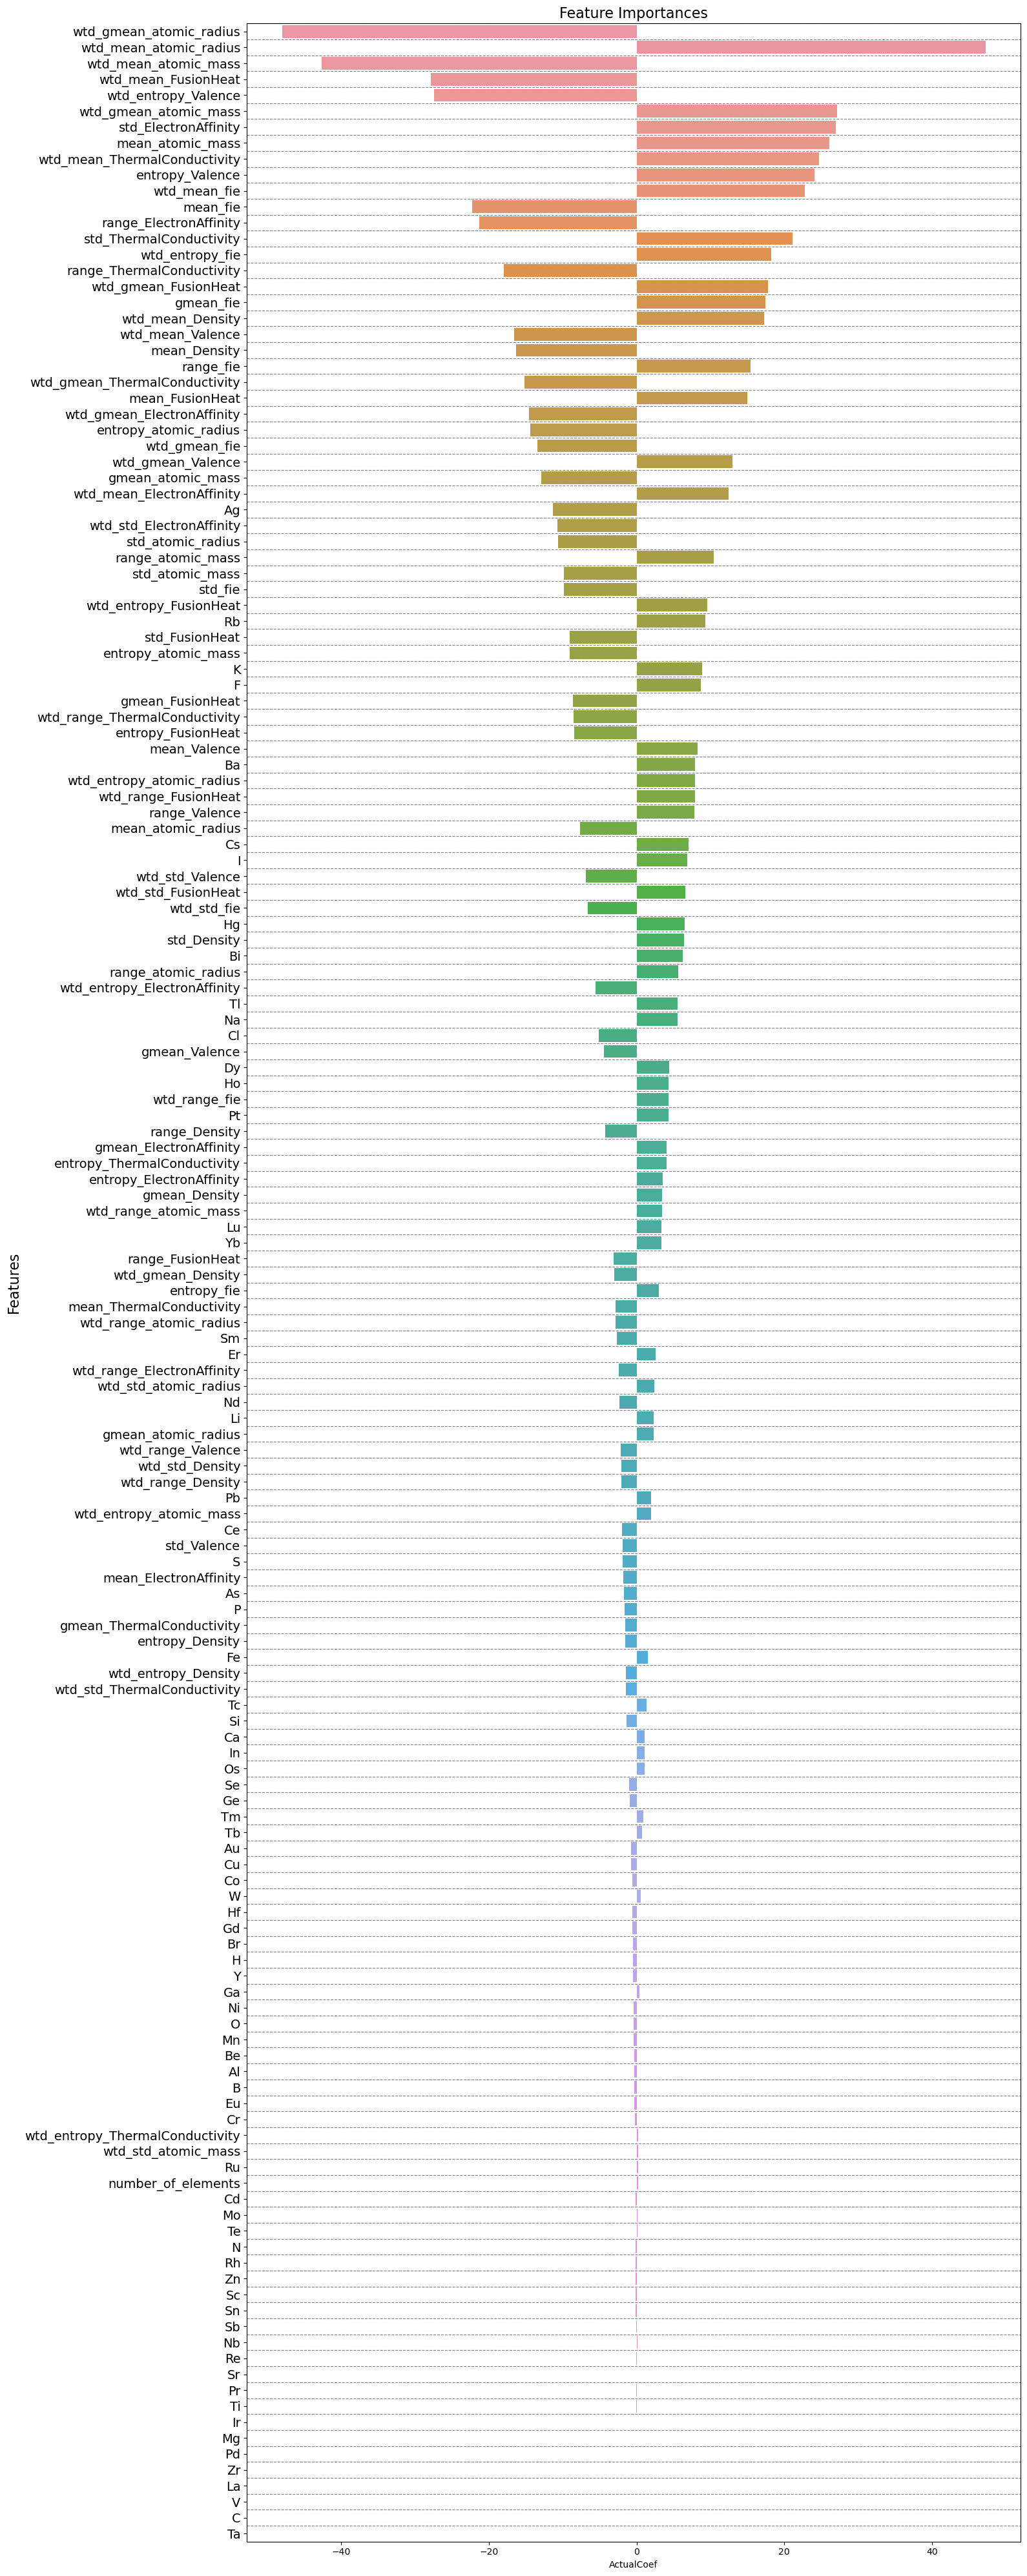

In [22]:
plt.figure(figsize=(16, 40))  

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=importance_df["Feature"], x=importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=16) 
plt.ylabel('Features', fontsize=16) 

tick_positions = range(len(importance_df["Feature"]))
tick_labels = importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=14) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()


In [23]:
# # Check important features
# %matplotlib inline
# plt.figure(figsize=(16, 46))
# plt.style.use('ggplot')

weights = pd.Series(lr.coef_[0], index=x.columns)
# weights.plot(kind='barh')  # Use barh instead of bar
# plt.show()

In [24]:
top_features = weights.sort_values(ascending=False).head(10)
print(top_features)


wtd_mean_atomic_radius          47.239540
wtd_gmean_atomic_mass           27.133920
std_ElectronAffinity            27.016978
mean_atomic_mass                26.080410
wtd_mean_ThermalConductivity    24.730599
entropy_Valence                 24.133792
wtd_mean_fie                    22.748247
std_ThermalConductivity         21.083425
wtd_entropy_fie                 18.254735
wtd_gmean_FusionHeat            17.765622
dtype: float64


In [25]:
data.shape

(21263, 159)

### LASSO

In [25]:
# import warnings
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
l1_model = Lasso(alpha=0.1)
l1_model.alpha


# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(l1_model, x, y, cv=10)
alpha = 100
for i in range(5):
    l1_model.alpha=alpha
    print(alpha, cross_val_score(l1_model, x, y, cv=10))
    print("----------")
    alpha = alpha / 10
    nmse = cross_val_score(l1_model, x, y, scoring = 'neg_mean_squared_error', cv=10)
    print(nmse.mean()*-1)

100 [-1.00889609 -0.95660268 -0.93637091 -0.738506   -0.03280919 -7.31117174
 -8.16148184 -6.52946117 -0.23901425 -1.49024997]
----------
1301.0048207652148
10.0 [-0.21334326 -0.20918819 -0.33490247 -0.07386607  0.21637729 -3.06690292
 -1.60131561 -0.93290673  0.37613981 -0.03812523]
----------
723.7651408773156
1.0 [ 0.31417997  0.36015904  0.31938747  0.40425263  0.56345513 -0.23285181
 -0.68735881 -0.20676649  0.63270177 -0.08221752]
----------
403.34444366568994
0.1 [ 0.411919    0.46540003 -0.03947098  0.4998782   0.63886427 -0.58165736
 -0.43489863 -0.14925057  0.69812569  0.09845474]
----------
390.5027735431935


C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e+05, tolerance: 2.122e+03
  model = cd_fast.enet_coordinate_descent(
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+05, tolerance: 2.103e+03
  model = cd_fast.enet_coordinate_descent(
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.674e+05, tolerance: 2.132e

0.01 [ 0.4489022   0.51342043 -1.29927299  0.53430948  0.66655577 -0.96169044
 -0.30787503 -4.37695155  0.72961848  0.16646725]
----------


C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e+05, tolerance: 2.122e+03
  model = cd_fast.enet_coordinate_descent(
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+05, tolerance: 2.103e+03
  model = cd_fast.enet_coordinate_descent(
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.674e+05, tolerance: 2.132e

551.2399939534819


C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.850e+05, tolerance: 2.335e+03
  model = cd_fast.enet_coordinate_descent(


In [126]:
#0.1 was the best Alpha for Lasso
l1_m = Lasso(alpha=0.1)
l1_m.fit(X_train,y_train)

pred = l1_m.predict(X_test)

# Calculate the mean squared error (you can use other metrics as well)
mse = mean_squared_error(y_test, pred)

# Print the score (in this case, mean squared error)
print("Mean Squared Error:", mse)




Mean Squared Error: 289.25202881926435


In [127]:
#Using Grid Search
lasso_model = Lasso(alpha=1)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_a = grid_search.best_params_['alpha']
best_m = grid_search.best_estimator_

predictions = best_m.predict(X_test)

mse = mean_squared_error(y_test, predictions)

# Print the best alpha value and the mean squared error
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502917.1015912413, tolerance: 1598.3544216121832
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495743.7047988344, tolerance: 1611.585039503153
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604099.058782838, tolerance: 1620.634237222392
  model = cd_fast.enet_coordinate_descent(
/Lib

Best Alpha: 100
Mean Squared Error: 335.8864459745255


In [132]:
#Applying that alpha to the cross val
lasso_m=Lasso()
lasso_m.alpha=100
-(cross_val_score(lasso_m,x,y,scoring="neg_mean_squared_error")).mean()

1447.4039428112783

## L1/Lasso Grid Search by Shikha

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()
n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
params = {'alpha': np.logspace(-6,6,20)}
lasso_grid_search = GridSearchCV(lasso_model, params, cv=splitter, n_jobs = -1, scoring='neg_mean_squared_error')
lasso_grid_search.fit(x, y)

best_lasso_score = lasso_grid_search.best_score_
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_lasso_model = lasso_grid_search.best_estimator_

In [59]:
best_lasso_score

-339.32207178258125

In [60]:
best_lasso_alpha

0.4832930238571752

In [61]:
best_lasso_model

Lasso(alpha=0.4832930238571752)

In [74]:
from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import mean_squared_error

lasso_predictions = cross_val_predict(best_lasso_model, x, y, cv=splitter)
lasso_predictions = lasso_predictions.reshape(21263,1)

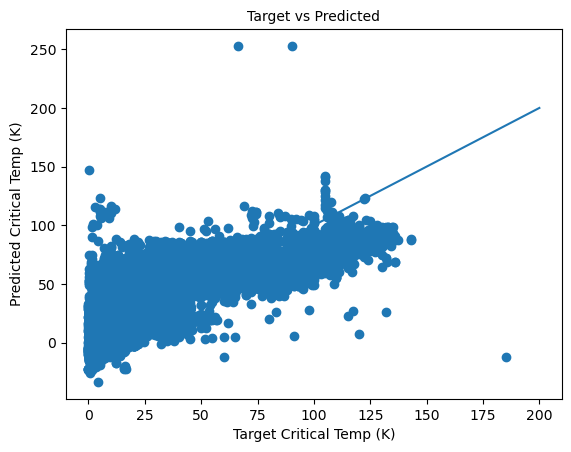

In [76]:
# Target vs predicted
plt.title('Target vs Predicted', fontsize=10) 
plt.ylabel('Predicted Critical Temp (K)', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, lasso_predictions)
plt.plot(np.linspace(0,200,500),np.linspace(0,200,500))

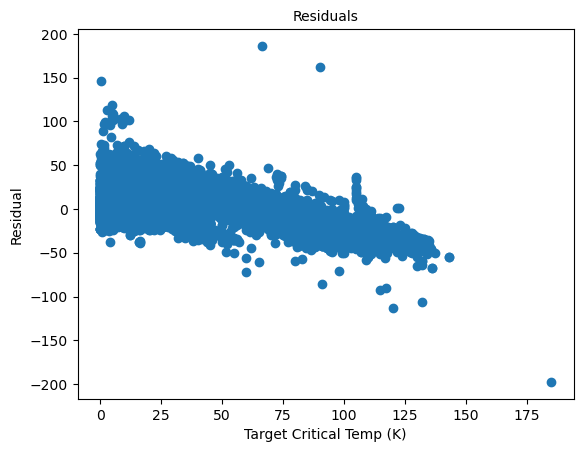

In [77]:
# Residuals
plt.title('Residuals', fontsize=10) 
plt.ylabel('Residual', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, lasso_predictions-y)

In [93]:
# Calculate feature importances (absolute values of coefficients)
lasso_actual_coef = best_lasso_model.coef_
lasso_importances = np.abs(best_lasso_model.coef_)
lasso_features = x.columns

# Create a DataFrame to hold feature importances and sort it
lasso_importance_df = pd.DataFrame({'Feature': lasso_features, 'Importance': lasso_importances, 'ActualCoef': lasso_actual_coef})
lasso_importance_df = lasso_importance_df[lasso_importance_df["Importance"]>0]
lasso_importance_df = lasso_importance_df.sort_values(by='Importance', ascending=False)

In [99]:
lasso_importance_df.head(n=10)

,Feature,Importance,ActualCoef
50,Ba,9.573920,9.573920
139,wtd_mean_ThermalConductivity,7.978479,7.978479
141,wtd_gmean_ThermalConductivity,6.312190,-6.312190
147,wtd_std_ThermalConductivity,4.317690,4.317690
76,Bi,4.007050,4.007050
157,wtd_std_Valence,3.994539,-3.994539
83,wtd_entropy_atomic_mass,3.892439,3.892439
121,wtd_gmean_ElectronAffinity,3.792394,-3.792394
16,Ca,3.661791,3.661791
84,range_atomic_mass,3.467950,3.467950


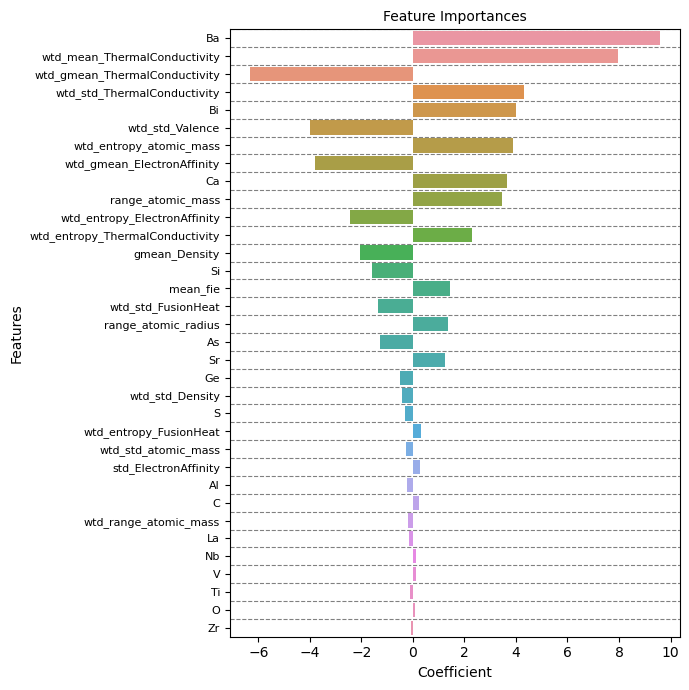

In [119]:
plt.figure(figsize=(7, 7))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=lasso_importance_df["Feature"], x=lasso_importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=10) 
plt.ylabel('Features', fontsize=10)
plt.xlabel('Coefficient', fontsize=10) 

tick_positions = range(len(lasso_importance_df["Feature"]))
tick_labels = lasso_importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=8) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()

### Ridge

In [112]:
ridge_model = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

# Print the best alpha value and the mean squared error
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)


Best Alpha: 100
Mean Squared Error: 275.8477056684473


## L2/Ridge by Shikha

In [95]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
lambdas = np.logspace(-6,6,20)
all_scores = []
all_std = []
alphas = []
for lambda_ in lambdas:
    ridge_model = Ridge(alpha=lambda_)
    scores = cross_val_score(ridge_model, x, y, cv=splitter, scoring='neg_mean_absolute_error')
    all_scores.append(scores)
    alphas.append([lambda_]*n_splits)
    all_std.append(scores.std())

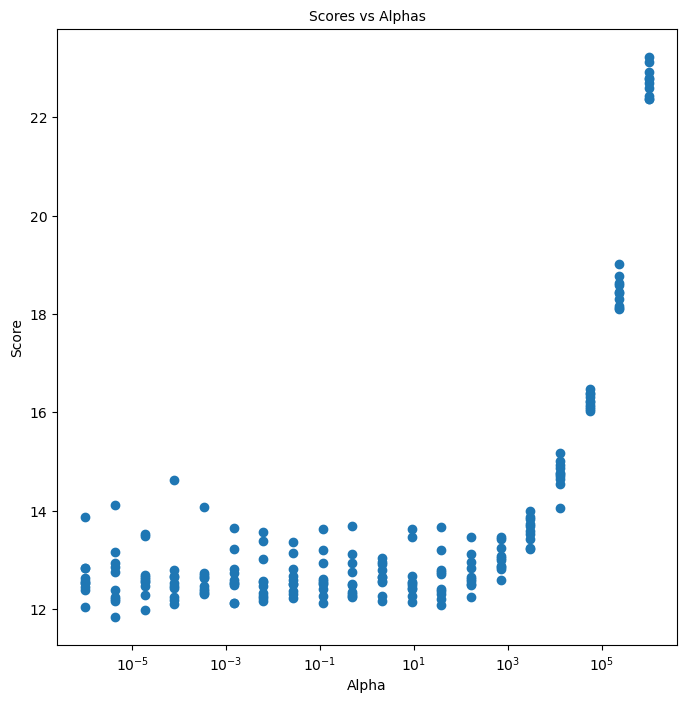

In [151]:
plt.figure(figsize=(8,8))
plt.title('Scores vs Alphas', fontsize=10) 
plt.ylabel('Score', fontsize=10)
plt.xlabel('Alpha', fontsize=10) 
plt.scatter(alphas, -np.array(all_scores).ravel())
plt.xscale('log')

In [43]:
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
n_splits = 10
splitter = KFold(shuffle=True, n_splits=n_splits)
params = {'alpha': np.logspace(-6,6,20)}
ridge_grid_search = GridSearchCV(ridge_model, params, cv=splitter, n_jobs = -1, scoring='neg_mean_squared_error')
ridge_grid_search.fit(x, y)

best_ridge_score = ridge_grid_search.best_score_
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
best_ridge_model = ridge_grid_search.best_estimator_

In [44]:
best_ridge_score

-335.7193419030649

In [45]:
best_ridge_alpha

2976.3514416313133

In [46]:
best_ridge_model

Ridge(alpha=2976.3514416313133)

In [50]:
from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import mean_squared_error

ridge_predictions = cross_val_predict(best_ridge_model, x, y, cv=splitter)

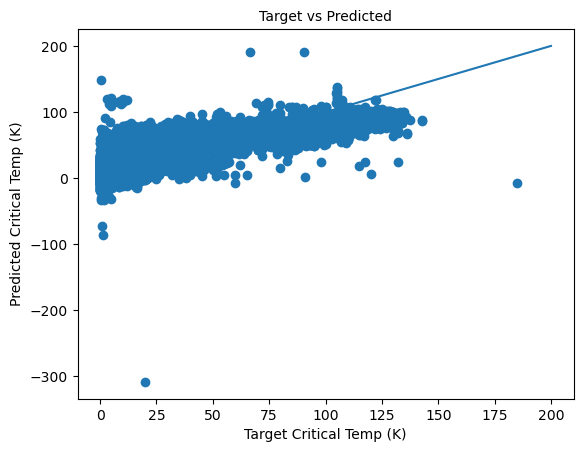

In [51]:
# Target vs predicted
plt.title('Target vs Predicted', fontsize=10) 
plt.ylabel('Predicted Critical Temp (K)', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, ridge_predictions)
plt.plot(np.linspace(0,200,500),np.linspace(0,200,500))

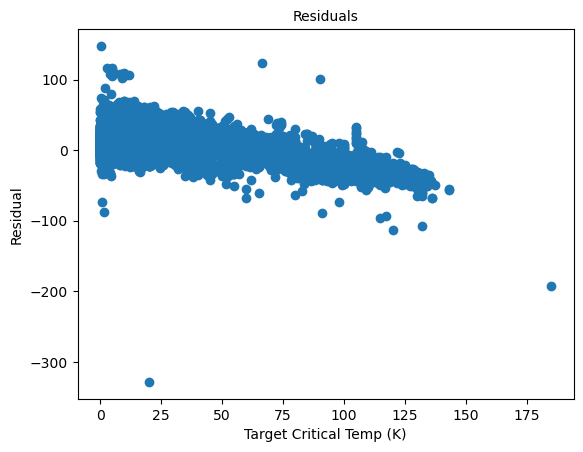

In [67]:
# Residuals
plt.title('Residuals', fontsize=10) 
plt.ylabel('Residual', fontsize=10)
plt.xlabel('Target Critical Temp (K)', fontsize=10) 
plt.scatter(y, ridge_predictions-y)

In [112]:
# Calculate feature importances (absolute values of coefficients)
ridge_actual_coef = best_ridge_model.coef_.reshape(158,)
ridge_importances = np.abs(ridge_actual_coef)
ridge_features = x.columns

# Create a DataFrame to hold feature importances and sort it
ridge_importance_df = pd.DataFrame({'Feature': ridge_features, 'Importance': ridge_importances, 'ActualCoef': ridge_actual_coef})
ridge_importance_df = ridge_importance_df.sort_values(by='Importance', ascending=False)

In [114]:
ridge_importance_df.head(n=10)

,Feature,Importance,ActualCoef
50,Ba,7.405116,7.405116
157,wtd_std_Valence,4.040834,-4.040834
139,wtd_mean_ThermalConductivity,3.958378,3.958378
147,wtd_std_ThermalConductivity,3.544033,3.544033
76,Bi,3.460322,3.460322
141,wtd_gmean_ThermalConductivity,3.133013,-3.133013
16,Ca,3.131764,3.131764
84,range_atomic_mass,3.099940,3.099940
123,wtd_entropy_ElectronAffinity,2.942656,-2.942656
121,wtd_gmean_ElectronAffinity,2.708341,-2.708341


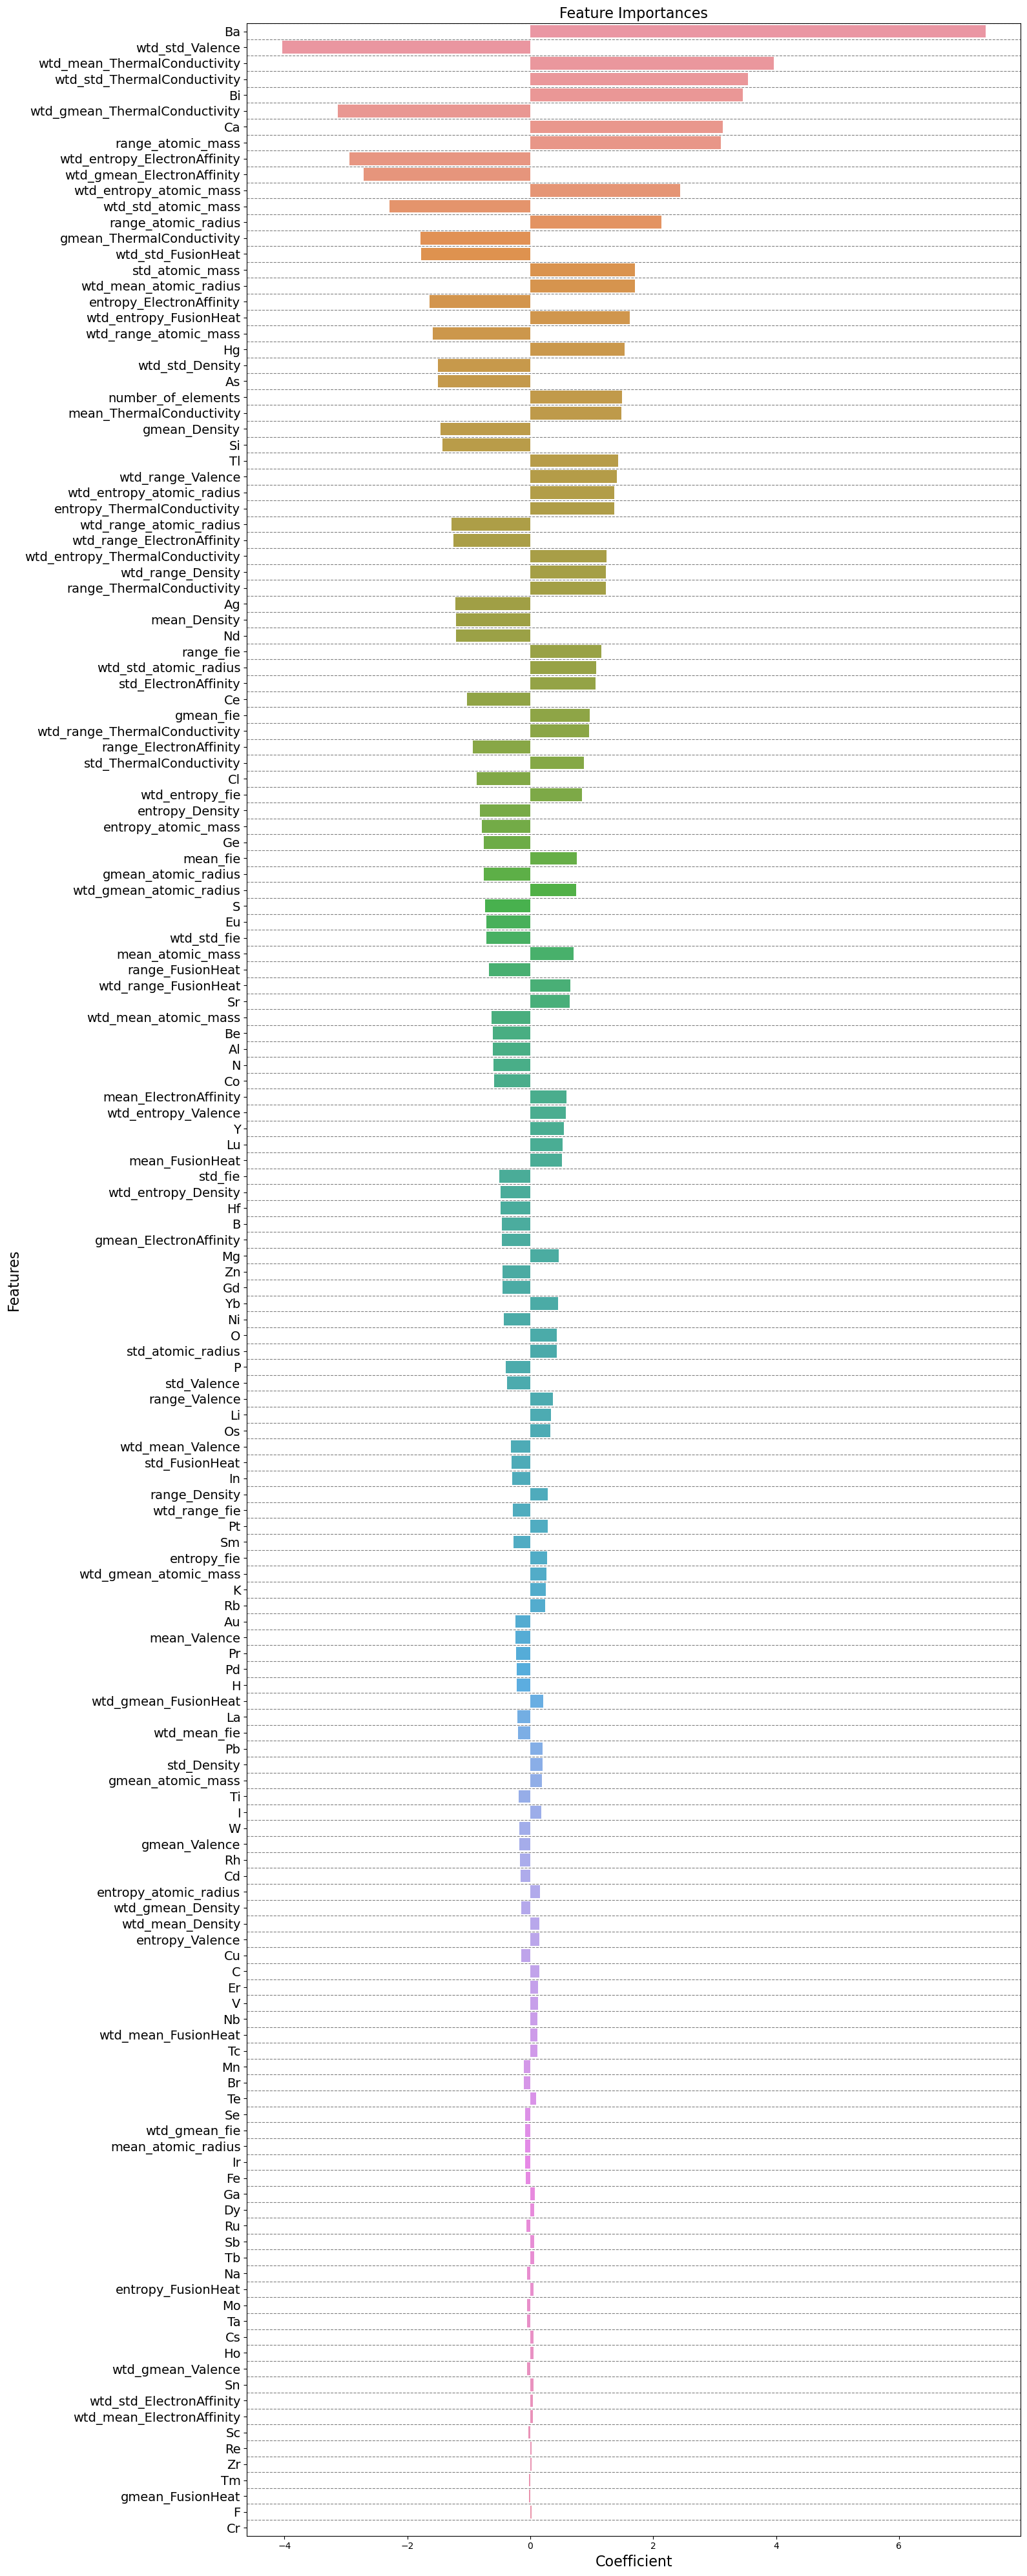

In [118]:
plt.figure(figsize=(16, 40))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=ridge_importance_df["Feature"], x=ridge_importance_df["ActualCoef"])

plt.title('Feature Importances', fontsize=16) 
plt.ylabel('Features', fontsize=16)
plt.xlabel('Coefficient', fontsize=16)

tick_positions = range(len(ridge_importance_df["Feature"]))
tick_labels = ridge_importance_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=14) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()

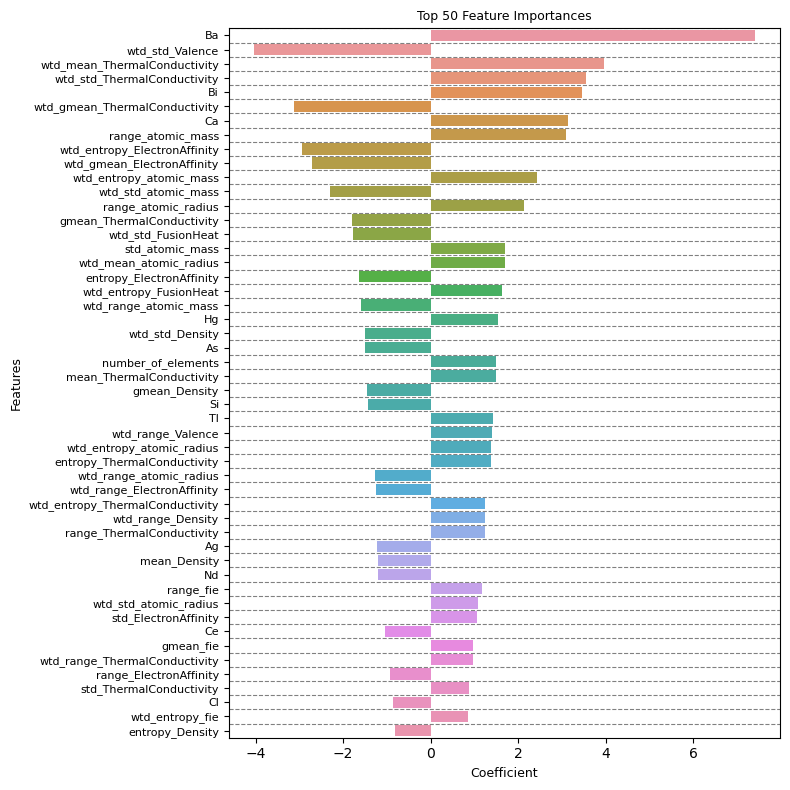

In [132]:
# Top 50 Ridge feature importances
ridge_topn_imp_df = ridge_importance_df.head(n=50)
plt.figure(figsize=(8, 8))

# Set the style to have a white background
plt.style.use('default')  # Use the default style
sns.barplot(y=ridge_topn_imp_df["Feature"], x=ridge_topn_imp_df["ActualCoef"])

plt.title('Top 50 Feature Importances', fontsize=9) 
plt.ylabel('Features', fontsize=9)
plt.xlabel('Coefficient', fontsize=9)

tick_positions = range(len(ridge_topn_imp_df["Feature"]))
tick_labels = ridge_topn_imp_df["Feature"]
plt.yticks(tick_positions, tick_labels, fontsize=8) 

for pos in tick_positions:
    plt.axhline(y=pos - 0.5, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()

plt.show()

+ Extra I tried to combine attributes by its type 
Do we need?
    number_of_elements
    **difference** 
    mean_atomic_mass, wtd_mean_atomic_mass, gmean_atomic_mass
    wtd_gmean_atomic_mass
    entropy_atomic_mass, wtd_entropy_atomic_mass
    range_atomic_mass, wtd_range_atomic_mass,
    std_atomic_mass, wtd_std_atomic_mass
    mean_fie, wtd_mean_fie, gmean_fie, wtd_gmean_fie
    entropy_fie, wtd_entropy_fie
    range_fie, wtd_range_fie
    std_fie, wtd_std_fie
    mean_atomic_radius, wtd_mean_atomic_radius, gmean_atomic_radius
    wtd_gmean_atomic_radius, entropy_atomic_radius,wtd_entropy_atomic_radius
    range_atomic_radius, wtd_range_atomic_radius
    std_atomic_radius,wtd_std_atomic_radius
    mean_Density, wtd_mean_Density, gmean_Density
    wtd_gmean_Density
    entropy_Density, wtd_entropy_Density, 
    range_Density, wtd_range_Density
    std_Density,wtd_std_Density
    mean_ElectronAffinity,wtd_mean_ElectronAffinity
    gmean_ElectronAffinity,wtd_gmean_ElectronAffinity
    entropy_ElectronAffinity,wtd_entropy_ElectronAffinity
    range_ElectronAffinity,wtd_range_ElectronAffinity
    std_ElectronAffinity, wtd_std_ElectronAffinity
    mean_FusionHeat, wtd_mean_FusionHeat, gmean_FusionHeat, wtd_gmean_FusionHeat
    entropy_FusionHeat, wtd_entropy_FusionHeat
    range_FusionHeat,wtd_range_FusionHeat
    std_FusionHeat, wtd_std_FusionHeat
    mean_ThermalConductivity, wtd_mean_ThermalConductivity, gmean_ThermalConductivity
    wtd_gmean_ThermalConductivity, entropy_ThermalConductivity
    wtd_entropy_ThermalConductivity
    range_ThermalConductivity, wtd_range_ThermalConductivity, std_ThermalConductivity
    wtd_std_ThermalConductivity
    mean_Valence, wtd_mean_Valence, gmean_Valence,wtd_gmean_Valence
    entropy_Valence, wtd_entropy_Valence, 
    range_Valence, wtd_range_Valence
    std_Valence, wtd_std_Valence
    critical_temp